# **lATENT dIRICHLET ARCHITECTURE[LDA]-TOPIC MODELLING**

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!pip install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
import numpy as np
import pandas as pd
import re
df = pd.read_csv("/content/generated.csv")

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text
df['preprocessed_paragraphs'] = df['Description'].apply(preprocess_text)
print(df['preprocessed_paragraphs'])

0                      worker wearing damaged handgloves
1                 malfunctioning temperature gauge jetty
2                    vegetation overgrown material house
3      waste disposal container kept without retentio...
4      found missing board removed general plant layo...
                             ...                        
592    strong smell solvent st floor corridor contrac...
593    safety rail guard bolt loosened cylinder loadi...
594                                     mcp access block
595    material store shutter found breakdownedspring...
596    grass cutting working traffic konn use inform ...
Name: preprocessed_paragraphs, Length: 597, dtype: object


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import LdaModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Description'])

# Step 2: Topic Modeling
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_output = lda_model.fit_transform(tfidf_matrix)

topic_assignments = []
for doc_vector in tfidf_matrix:
    topic_scores = lda_model.transform(doc_vector)
    top_topic = topic_scores.argmax()
    topic_assignments.append(top_topic)

# Step 5: Organize paragraphs by topic
paragraphs_by_topic = {i: [] for i in range(lda_model.n_components)}
for i, topic_idx in enumerate(topic_assignments):
    paragraphs_by_topic[topic_idx].append(df['preprocessed_paragraphs'][i])

# Print paragraphs grouped by topic
for topic_idx, paragraphs in paragraphs_by_topic.items():
    print(f"Topic {topic_idx + 1}:")
    for paragraph in paragraphs:
        print(paragraph)
    print()
# Step 4: Assign topics to paragraphs

"""topic_paragraphs = {}
for topic_idx, topic_weights in enumerate(lda_output):
    topic_paragraphs[topic_idx] = []

for i, doc in enumerate(df['preprocessed_paragraphs']):
    top_topic = lda_output[i].argmax()
    topic_paragraphs[top_topic].append(doc)
print(topic_paragraphs)"""

# Step 4: Generate word clouds for each topic
"""for topic_idx, paragraphs in topic_paragraphs.items():
    all_paragraphs = ' '.join(paragraphs)
    wordcloud = WordCloud(stopwords='english', background_color='white').generate(all_paragraphs)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic {topic_idx + 1} Paragraphs')
    plt.axis('off')
    plt.show()
"""
"""all_descriptions = ' '.join(df['preprocessed_paragraphs'])
wordcloud = WordCloud(stopwords='english', background_color='white').generate(all_descriptions)

# Step 4: Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Descriptions')
plt.axis('off')
plt.show()"""
# Step 3: Interpretation
"""feature_names = tfidf_vectorizer.get_feature_names_out()
topic_keywords = []
for topic_weights in lda_model.components_:
    top_keyword_idxs = topic_weights.argsort()[:-10-1:-1]
    topic_keywords.append([feature_names[idx] for idx in top_keyword_idxs])
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for i, keywords in enumerate(topic_keywords):
    wordcloud = WordCloud(background_color='white').generate(' '.join(keywords))
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {i+1} Keywords')
    plt.axis('off')
    plt.show()"""

"""topic_labels = {
        0: "workplace and safety issues",
        1: "equipment and facilities maintenance",
        2: "utilities and infrastructure",
        3: "outdoor and environmental conditions",
        4: "personal safety equipment and transportation"
    }
    # Classification
    # Assign each paragraph to the topic with the highest probability
topic_predictions = [topic_labels[i] for i in lda_output.argmax(axis=1)]

    # Add the predicted topics to the DataFrame
df['Predicted Topic'] = topic_predictions

    # Count the occurrences of each topic label
topic_counts = df['Predicted Topic'].value_counts()
df"""


Topic 1:
malfunctioning temperature gauge jetty
one person standing ladder porta cabin leaning talking person standing ground
old metal tray fixed ground near pathway next porta cabin pc removed trip hazard informed engineering team correction
rkm vendor loaded bucket incorrectly causing fall floor door opened
wire paver area
cont garden watered tree withered
main geat area girl damage
executive operation
main geat area demage
shailihjhnj
main geat area girl road crack
main geat area geat girl crack
dasd
wailing manual hand siren working sometime
carton robot pallet placing area blocked
avts old stoper removed
guard protection available rotating chain conveyor
kg filling sop board found damaged
fan ka reguletar tuta hua hai
tack weld filling shed staircase near filling machine contact step
door kept open construction site closed dust construction site penetrate office space
ring missing cylinder
ring missing cylinder
nrv fan make noice
start filling safety cap cylinder removed
observed

'topic_labels = {\n        0: "workplace and safety issues",\n        1: "equipment and facilities maintenance",\n        2: "utilities and infrastructure",\n        3: "outdoor and environmental conditions",\n        4: "personal safety equipment and transportation"\n    }\n    # Classification\n    # Assign each paragraph to the topic with the highest probability\ntopic_predictions = [topic_labels[i] for i in lda_output.argmax(axis=1)]\n\n    # Add the predicted topics to the DataFrame\ndf[\'Predicted Topic\'] = topic_predictions\n\n    # Count the occurrences of each topic label\ntopic_counts = df[\'Predicted Topic\'].value_counts()\ndf'

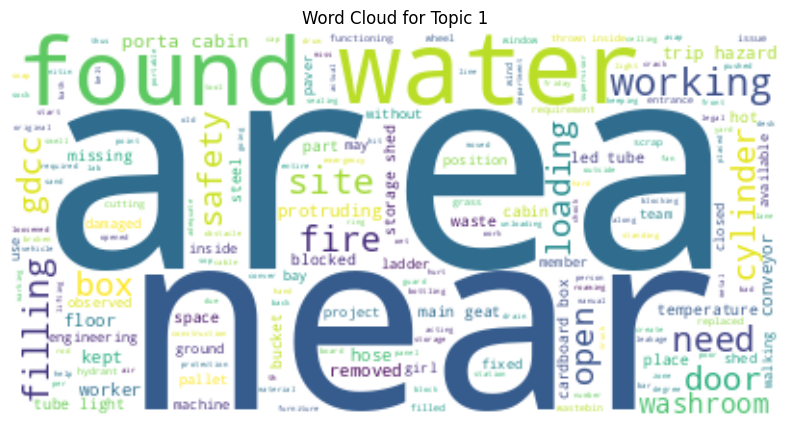

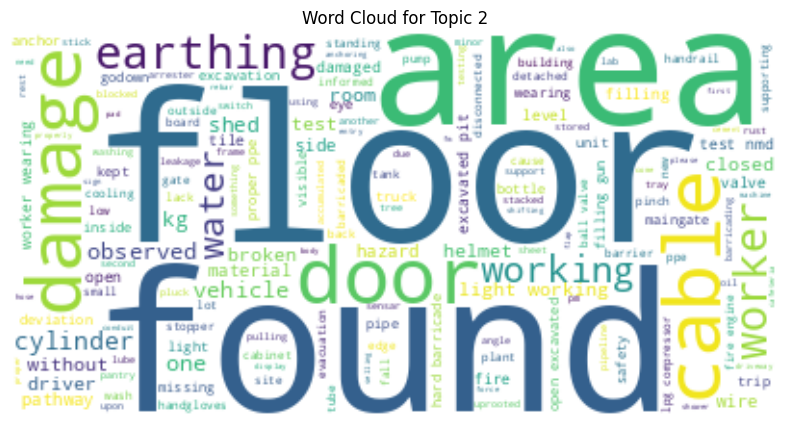

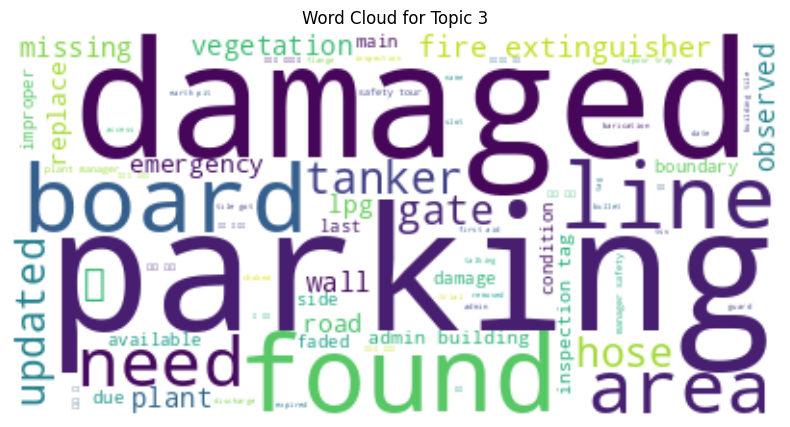

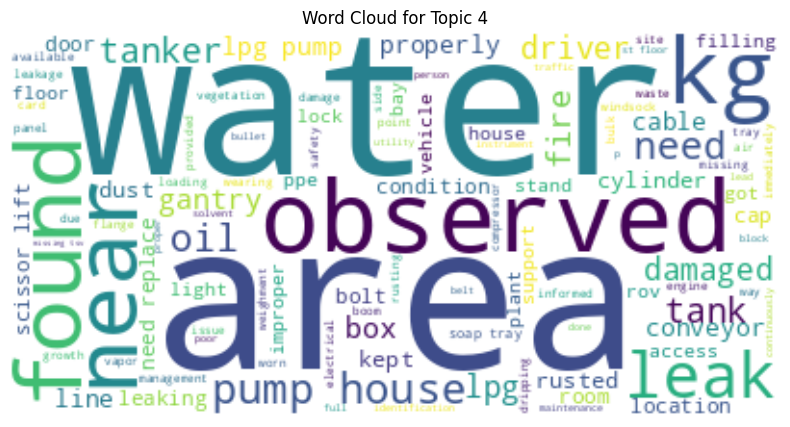

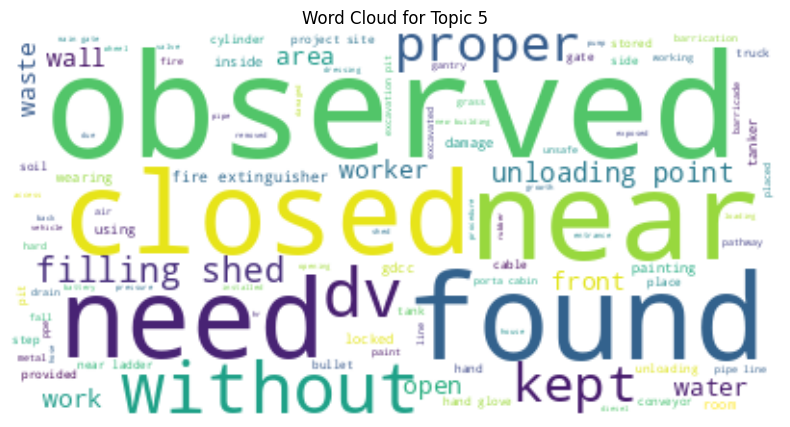

In [ ]:
for topic_idx, paragraphs in paragraphs_by_topic.items():
    all_paragraphs = ' '.join(paragraphs)
    wordcloud = WordCloud(stopwords='english', background_color='white').generate(all_paragraphs)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic {topic_idx + 1}')
    plt.axis('off')
    plt.show()


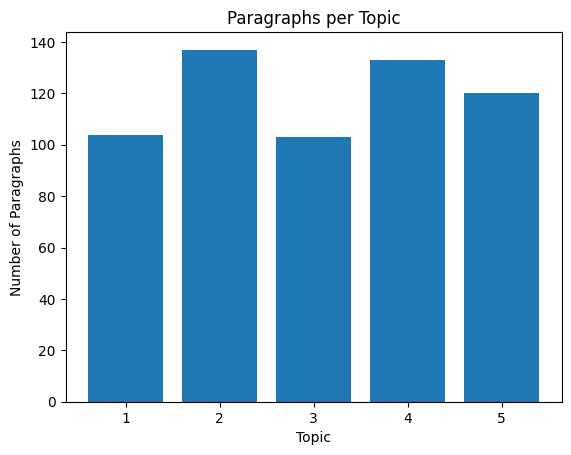

Topic 1: 104 paragraphs
Topic 2: 137 paragraphs
Topic 3: 103 paragraphs
Topic 4: 133 paragraphs
Topic 5: 120 paragraphs


In [ ]:
topic_counts = pd.Series(topic_assignments).value_counts().sort_index()

# Step 6: Plot the bar chart
plt.bar(topic_counts.index + 1, topic_counts.values)
plt.title('Paragraphs per Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Paragraphs')
plt.xticks(range(1, len(topic_counts) + 1))
plt.show()

topic_counts = pd.Series(topic_assignments).value_counts().sort_index()

# Step 6: Print the counts for each topic
for topic, count in topic_counts.items():
    print(f"Topic {topic + 1}: {count} paragraphs")

In [ ]:
df.head(20)

,NMD,Description,Case Type,Created On,Reported By,Reporter Name,Reporter Company,Division,Department,Site,...,Immediate Cause,Immediate Cause Corrective Actions,Immediate Cause Preventive Actions,Immediate Cause Corrective Actions Remarks,Immediate Cause Preventive Actions Remarks,Immediate Cause Corrective Action Status,Immediate Cause Preventive Action Status,Closed Date,preprocessed_paragraphs,Predicted Topic
0,NMD130183,Worker was wearing damaged handgloves,deviation,01-01-2024,Total Employee,TANAYA CHATTERJEE,Total,LPG,Operations & Logistics,LPG Mangalore,...,Defective PPE used,Stop card deployed,Defective PPPE replaced with good one,NaN,NaN,Completed,Completed,NaN,worker wearing damaged handgloves,equipment and facilities maintenance
1,NMD152558,malfunctioning of temperature gauge in jetty,deviation,25-12-2023,Total Employee,Aravind NEMAKAL,Total,LPG,Operations & Logistics,LPG Mangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,malfunctioning temperature gauge jetty,workplace and safety issues
2,NMD228936,Vegetation overgrown at material house,deviation,02-01-2024,Total Employee,C . Mogulaiah,Sis,LPG,CONTRACT WORKER,LPG Hyderabad,...,Inadequate Housekeeping,Vegetation to be removed,Vegetation to be removed,NaN,NaN,completed,completed,13-02-2024,vegetation overgrown material house,utilities and infrastructure
3,NMD225617,Waste disposal containers are kept without ret...,deviation,02-01-2024,Total Employee,ASHOK KUMAR GOYAL,Total,TCAP,TCAP,TCAP,...,Spillage of oil to the cabins,Cleaning of cabins where spillage was found,All vessels to be kept on retention trays.,NaN,NaN,completed,completed,03-03-2024,waste disposal container kept without retentio...,equipment and facilities maintenance
4,NMD446472,Found missing board or removed from the genera...,deviation,04-01-2024,Total Employee,Rahman khan,SIS,LPG,CONTRACT WORKER,LPG Hyderabad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,found missing board removed general plant layo...,utilities and infrastructure
5,NMD415614,Found that some of the workers were decanting ...,deviation,04-01-2024,Total Employee,PRAKHAR JAIN,Total,Corporte Office Mumbai,HSEQ,Lubes Mahape,...,Carelessness,Instruction given to wear required PPEs.,Supervision,NaN,NaN,completed,completed,10-01-2024,found worker decanting small lube bottle proce...,equipment and facilities maintenance
6,NMD452844,There is no barricading indication at the work...,deviation,04-01-2024,Total Employee,VISHNU REDDY,Total,TCAP,TCAP,TCAP,...,Unauthorised entry not prohibited and chances ...,Reported the situation to contractor HSE and P...,Proposed for the display of signage and to kee...,NaN,NaN,completed,completed,04-01-2024,barricading indication work progress area seco...,equipment and facilities maintenance
7,NMD59799,Vegetation to be removed in HT yard area,deviation,05-01-2024,Total Employee,USHANNA,SIS,LPG,CONTRACT WORKER,LPG Hyderabad,...,Inadequate Housekeeping,Vegetation to be removed.,Vegetation to be removed.,NaN,NaN,completed,completed,05-02-2024,vegetation removed ht yard area,utilities and infrastructure
8,NMD538618,Workers were observed to be wearing cut resist...,deviation,04-01-2024,Total Employee,MAHIR ZAHOOR PATHAN,Total,Corporte Office Mumbai,HSEQ,Lubes Mahape,...,Lack of knowledge,stop card issued and informed worker on correc...,Proper PPEs - Nitriile gloves were worn,NaN,NaN,completed,completed,10-01-2024,worker observed wearing cut resistant hand glo...,personal safety equipment and transportation
9,NMD524837,Vegetation to be removed in Parking area,deviation,05-01-2024,Total Employee,C . Mogulaiah,Sis,LPG,CONTRACT WORKER,LPG Hyderabad,...,Inadequate Housekeeping,Vegetation to be removed.,Vegetation to be removed.,NaN,NaN,completed,completed,13-02-2024,vegetation removed parking area,utilities and infrastructure


In [ ]:
topic_counts = df['Predicted Topic'].value_counts()
for topic, count in topic_counts.items():
    print(f"Topic '{topic}': {count} paragraphs")

Topic 'equipment and facilities maintenance': 137 paragraphs
Topic 'outdoor and environmental conditions': 133 paragraphs
Topic 'personal safety equipment and transportation': 120 paragraphs
Topic 'workplace and safety issues': 104 paragraphs
Topic 'utilities and infrastructure': 103 paragraphs


In [ ]:

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Description'])
feature_names = tfidf_vectorizer.get_feature_names_out()
#print("Feature Names (Vocabulary):")
#print(feature_names)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_output = lda_model.fit_transform(tfidf_matrix)
top_keywords = []
for topic_weights in lda_model.components_:
    top_keyword_idxs = topic_weights.argsort()[:-10-1:-1]
    top_keywords.append([feature_names[idx] for idx in top_keyword_idxs])
for i, keywords in enumerate(top_keywords):
    print(f"Topic {topic} keywords: {', '.join(keywords)}")
topic_counts = df['Predicted Topic'].value_counts()
for topic, count in topic_counts.items():
    print(f"Topic ' {topic}': {count} paragraphs")

Topic utilities and infrastructure keywords: loading, area, water, working, cylinders, cabin, near, washroom, storage, removed
Topic utilities and infrastructure keywords: test, light, working, floor, earthing, door, nmd, damage, worker, broken
Topic utilities and infrastructure keywords: damaged, parking, board, admin, updated, line, tag, wall, inspection, plant
Topic utilities and infrastructure keywords: water, house, pump, leak, area, oil, observed, lpg, need, tank
Topic utilities and infrastructure keywords: unloading, near, observed, dv, waste, point, shed, extinguisher, closed, proper
Topic ' equipment and facilities maintenance': 137 paragraphs
Topic ' outdoor and environmental conditions': 133 paragraphs
Topic ' personal safety equipment and transportation': 120 paragraphs
Topic ' workplace and safety issues': 104 paragraphs
Topic ' utilities and infrastructure': 103 paragraphs


In [ ]:
topic_keywords_dict = {}

for i, keywords in enumerate(top_keywords):
    topic_name = topic_labels.get(i, f"Topic {i+1}")
    topic_keywords_dict[topic_name] = keywords

print(topic_keywords_dict)
print(top_keywords)

{'workplace and safety issues': ['loading', 'area', 'water', 'working', 'cylinders', 'cabin', 'near', 'washroom', 'storage', 'removed'], 'equipment and facilities maintenance': ['test', 'light', 'working', 'floor', 'earthing', 'door', 'nmd', 'damage', 'worker', 'broken'], 'utilities and infrastructure': ['damaged', 'parking', 'board', 'admin', 'updated', 'line', 'tag', 'wall', 'inspection', 'plant'], 'outdoor and environmental conditions': ['water', 'house', 'pump', 'leak', 'area', 'oil', 'observed', 'lpg', 'need', 'tank'], 'personal safety equipment and transportation': ['unloading', 'near', 'observed', 'dv', 'waste', 'point', 'shed', 'extinguisher', 'closed', 'proper']}
[['loading', 'area', 'water', 'working', 'cylinders', 'cabin', 'near', 'washroom', 'storage', 'removed'], ['test', 'light', 'working', 'floor', 'earthing', 'door', 'nmd', 'damage', 'worker', 'broken'], ['damaged', 'parking', 'board', 'admin', 'updated', 'line', 'tag', 'wall', 'inspection', 'plant'], ['water', 'house',

In [ ]:
outdoor_topic_index = 3  # Assuming the index of the outdoor topic in top_keywords list

# Add "grass" to the keywords associated with the outdoor topic
top_keywords[outdoor_topic_index].append("grass")
for i, keywords in enumerate(top_keywords):
    topic_name = topic_labels.get(i, f"Topic {i+1}")
    topic_keywords_dict[topic_name] = keywords

print(topic_keywords_dict)

{'workplace and safety issues': ['loading', 'area', 'water', 'working', 'cylinders', 'cabin', 'near', 'washroom', 'storage', 'removed'], 'equipment and facilities maintenance': ['test', 'light', 'working', 'floor', 'earthing', 'door', 'nmd', 'damage', 'worker', 'broken'], 'utilities and infrastructure': ['damaged', 'parking', 'board', 'admin', 'updated', 'line', 'tag', 'wall', 'inspection', 'plant'], 'outdoor and environmental conditions': ['water', 'house', 'pump', 'leak', 'area', 'oil', 'observed', 'lpg', 'need', 'tank', 'grass'], 'personal safety equipment and transportation': ['unloading', 'near', 'observed', 'dv', 'waste', 'point', 'shed', 'extinguisher', 'closed', 'proper']}


# **The Complete Code UNTIL JSON STRINGS**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

def topic_modeling(csv_path):
    df = pd.read_csv(csv_path)
    df['preprocessed_text'] = df['Description'].apply(preprocess_text)
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Description'])
    lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
    lda_output = lda_model.fit_transform(tfidf_matrix)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_idxs = topic_weights.argsort()[:-10-1:-1]
        topic_keywords.append([feature_names[idx] for idx in top_keyword_idxs])
    topic_labels = {
        0: "workplace and safety issues",
        1: "equipment and facilities maintenance",
        2: "utilities and infrastructure",
        3: "outdoor and environmental conditions",
        4: "personal safety equipment and transportation"
    }
    topic_predictions = [topic_labels[i] for i in lda_output.argmax(axis=1)]
    df['Predicted Topic'] = topic_predictions
    topic_counts = df['Predicted Topic'].value_counts()
    return topic_counts,df

if __name__ == "__main__":
    topic_counts = topic_modeling("/content/generated.csv")
    #print("DataFrame:")
    print(df)
    print("\nTopic Counts:")
    print(topic_counts)


           NMD                                        Description  Case Type  \
0    NMD130183              Worker was wearing damaged handgloves  deviation   
1    NMD152558       malfunctioning of temperature gauge in jetty  deviation   
2    NMD228936             Vegetation overgrown at material house  deviation   
3    NMD225617  Waste disposal containers are kept without ret...  deviation   
4    NMD446472  Found missing board or removed from the genera...  deviation   
..         ...                                                ...        ...   
592  NMD510882  Strong smell of solvent in the 1st floor corri...  deviation   
593  NMD527043  Safety Rail guard bolts are loosened, at cylin...  deviation   
594  NMD647939                                  MCP Access block   deviation   
595  NMD638065  material store shutter found breakdowned,sprin...   nearmiss   
596  NMD639220  Grass cutting  working but traffic konn not us...  deviation   

     Created On     Reported By       R

In [ ]:
def generate_json_string(df, topic_counts):
    topic_counts_dict = topic_counts.to_dict()
    result_dict = {}
    for index, row in df.iterrows():
        count = row['Predicted Topic']
        nmd = row['NMD']
        description = row['Description']
        immediate_cause = row['Immediate Cause Corrective Actions']
        reported_by = row['Reporter Company']
        one_maestro = row['One Maestro']
        row_dict = {
            'NMD': nmd,
            'Description': description,
            'Immediate Cause Corrective Actions': immediate_cause,
            'Reporter Company': reported_by,
            'One Maestro': one_maestro
        }
        if count not in result_dict:
            result_dict[count] = {'count': topic_counts_dict[count], 'descriptions': []}
        result_dict[count]['descriptions'].append(row_dict)

    json_string = json.dumps(result_dict, indent=4)
    return json_string

if __name__ == "__main__":
    df, topic_counts, _ = topic_modelling("/content/generated.csv")
    json_string = generate_json_string(df, topic_counts)
    print(json_string)
    print("DataFrame:")
    print(df)
    print("\nTopic Counts:")
    print(topic_counts)

{
    "personal safety equipment and transportation": {
        "count": 86,
        "descriptions": [
            {
                "NMD": "NMD130183",
                "Description": "Worker was wearing damaged handgloves",
                "Immediate Cause Corrective Actions": "Stop card deployed",
                "Reporter Company": "Total",
                "One Maestro": "Risk management"
            },
            {
                "NMD": "NMD415614",
                "Description": "Found that some of the workers were decanting of small lubes bottles. This process was having removal of left oil from bottles and some of the workers were not wearing the gloves and one worker was not wearing helmet.",
                "Immediate Cause Corrective Actions": "Instruction given to wear required PPEs.",
                "Reporter Company": "Total",
                "One Maestro": "Operational accountability"
            },
            {
                "NMD": "NMD653094",
                "Des

# ** JSON CONVERSION**

In [ ]:
json = df.to_json()

# Print json object
print(json)

In [ ]:
import pandas as pd
import json

# Assuming you already have the DataFrame 'df' and the topic counts 'topic_counts'

# Initialize an empty dictionary to store the results
result_dict = {}

# Iterate over the DataFrame rows
for index, row in df.iterrows():
    # Get the count for the current row
    count = row['Predicted Topic']

    # Convert the row to a dictionary
    row_dict = row.to_dict()

    # Remove the 'Predicted Topic' key from the row dictionary
    del row_dict['Predicted Topic']

    # Add the row data to the result dictionary
    if count not in result_dict:
        result_dict[count] = []
    result_dict[count].append(row_dict)

# Convert the result dictionary to JSON format
json_string = json.dumps(result_dict, indent=4)

# Print the JSON string
print(json_string)


In [ ]:
df.info()

In [ ]:
import pandas as pd
import json
topic_counts_dict = topic_counts.to_dict()
result_dict = {}
for index, row in df.iterrows():
    count = row['Predicted Topic']
    nmd=row['NMD']
    description = row['Description']
    immediate_cause = row['Immediate Cause Corrective Actions']
    reported_by = row['Reporter Company']
    one_maestro = row['One Maestro']
    row_dict = {
        'NMD':nmd,
        'Description': description,
        'Immediate Cause Corrective Actions': immediate_cause,
        'Reporter Company': reported_by,
        'One Maestro': one_maestro
    }
    if count not in result_dict:
        result_dict[count] = {'count': topic_counts_dict[count],'descriptions': []}
    result_dict[count]['descriptions'].append(row_dict)
json_string = json.dumps(result_dict, indent=4)
print(json_string)

In [ ]:
import pandas as pd
import json
result_dict = {}
for index, row in df.iterrows():
    count = row['Predicted Topic']
    nmd=row['NMD']
    description = row['Description']
    immediate_cause = row['Immediate Cause Corrective Actions']
    reported_by = row['Reporter Company']
    one_maestro = row['One Maestro']

    row_dict = {
        'NMD':nmd,
        'Description': description,
        'Immediate Cause Corrective Actions': immediate_cause,
        'Reported Company': reported_by,
        'One Maestro': one_maestro
    }
    if count not in result_dict:
        result_dict[count] = []
    result_dict[count].append(row_dict)
json_string = json.dumps(result_dict, indent=4)
print(json_string)


In [ ]:
import numpy as np
import pandas as pd

data = np.array([['1', '2'], ['3', '4'],['5','6']])

dataFrame = pd.DataFrame(data, columns = ['col1', 'col2'])
json = dataFrame.to_json()
print(json)

json_split = dataFrame.to_json(orient ='split')
print("json_split = ", json_split, "\n")

json_records = dataFrame.to_json(orient ='records')
print("json_records = ", json_records, "\n")

json_index = dataFrame.to_json(orient ='index')
print("json_index = ", json_index, "\n")

json_columns = dataFrame.to_json(orient ='columns')
print("json_columns = ", json_columns, "\n")

json_values = dataFrame.to_json(orient ='values')
print("json_values = ", json_values, "\n")

json_table = dataFrame.to_json(orient ='table')
print("json_table = ", json_table, "\n")


In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



import json

def topic_modelling(csv_path):
    # Load the DataFrame
    df = pd.read_csv(csv_path)
    def preprocess_text(text):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        tokens = nltk.word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        preprocessed_text = ' '.join(tokens)
        return preprocessed_text
    df['preprocessed_paragraphs'] = df['Description'].apply(preprocess_text)

    # TF-IDF vectorization
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_paragraphs'])

    # Topic Modeling
    lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
    lda_output = lda_model.fit_transform(tfidf_matrix)

    # Interpretation
    feature_names = tfidf_vectorizer.get_feature_names_out()
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_idxs = topic_weights.argsort()[:-10-1:-1]
        topic_keywords.append([feature_names[idx] for idx in top_keyword_idxs])

    # Define topic labels
    topic_labels = {
        0: "workplace and safety issues",
        1: "equipment and facilities maintenance",
        2: "utilities and infrastructure",
        3: "outdoor and environmental conditions",
        4: "personal safety equipment and transportation"
    }

    topic_predictions = [topic_labels[i] for i in lda_output.argmax(axis=1)]
    df['Predicted Topic'] = topic_predictions
    topic_counts = df['Predicted Topic'].value_counts()



    # Convert topic_counts to dictionary
    topic_counts_dict = topic_counts.to_dict()

    # Create JSON array
    result_dict = {}
    for index, row in df.iterrows():
        count = row['Predicted Topic']
        nmd = row['NMD']
        description = row['Description']
        immediate_cause = row['Immediate Cause Corrective Actions']
        reported_by = row['Reporter Company']
        one_maestro = row['One Maestro']
        row_dict = {
            'NMD': nmd,
            'Description': description,
            'Immediate Cause Corrective Actions': immediate_cause,
            'Reporter Company': reported_by,
            'One Maestro': one_maestro
        }
        if count not in result_dict:
            result_dict[count] = {'count': topic_counts_dict[count], 'descriptions': []}
        result_dict[count]['descriptions'].append(row_dict)

        json_string = json.dumps(result_dict, indent=4)

    # Return DataFrame, topic_counts, and JSON string
    return df, topic_counts, json_string

# Entry point for the script when executed independently
if __name__ == "__main__":
    result=topic_modeling("/content/generated.csv")

    print("DataFrame:")
    #print(result[0])
    print("\nTopic Counts:")
    #print(result[1])
    print("\nJSON String:")
    print(result)